# Numerisk løsning av enkel harmonisk pendel

### TFY4163 Fluidmekanikk og bølgefysikk - Programmeringsøving 1 

$\textbf{Forkunnskaper:}$ Numpy arrays, plotting med matplotlib og bruk av Euler metoden for å løse differensialligninger.   

$\textbf{Læringsmål:}$ Løsning av andreordens ODE ved Euler metoden, numerisk stabilitet for Euler metoden og plotting av data. 

---------------------------

I denne øvingen skal vi se på enkel harmonisk pendelbevegelse til en punktmasse. I denne modellen henger en punktmasse fra en masseløs, utøyelig snor. Vi skal først se på den analytiske løsningen av ligningen, og plotte vinkelutslaget. Deretter går vi over til numerisk løsning ved Euler metoden, som dere ble kjent med i FY1001 Mekanisk fysikk.   

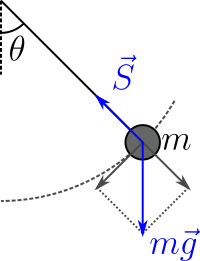
<span align="center"><strong>Figur 1:</strong> <em>Enkel pendel med masse $m$ og utslagsvinkel $\theta$.</em></span>


I figur 1 er kreftene som virker på massen som henger fra snora vist. Her er $\vec{S}$ snorkrafta og $m\vec{g}$ gravitasjonskraften. Vi antar her at kun disse to kreftene virker på massen.

## Oppgave 1 - Analytisk løsning av bevegelsesligningen for pendelen


$\textbf{a)}$ Vis at bevegelsesligningen for pendelen er gitt ved

$$\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta, $$

hvor $\theta$ er vinkelutslaget til snora med hensyn til vertikalen, $g$ er tyngdeakselerasjonen og $l$ er lengden av snora.


-------------

SKRIV HER (eller på papir)

----------

Anta at vinkelutslaget er lite, slik at vi kan anta $\sin \theta \approx \theta$. Slik at bevegelsesligningen da er gitt ved

\begin{equation}
 	\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \theta.
	\label{enkelbevegelse}
\end{equation}

Den analytiske løsningen av bevegelsesligningen over er

\begin{equation}
 	\theta(t) = \theta_0 \cos(\omega t + \phi),
	\label{eq:losning}
\end{equation}

med $\omega = \sqrt{g/l}$, og $\phi$ er fasen.

$\textbf{b)}$ Plot den analytiske løsningen for vinkelutslaget, $\theta$, over som funksjon av tid, $t$, fram til $t=10$s. Bruk $g = 9.8$ $\text{m}/\text{s}^2$ og $l = 1.0$ m. Sett $\phi = 0$. Pass på at plottet har navn på akser, og ha med tittel. 

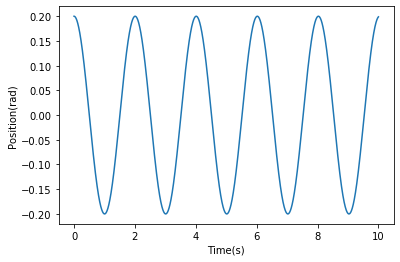

In [1]:
# Remember to import nescessary libraries
import numpy as np
import matplotlib.pyplot as plt

# To show figures in the notebook
%matplotlib inline

# Physical constants
theta_0 = 0.2
g = 9.8
l = 1.0
phi = 0

# Timing constants
T = 10.0       # [s], Plot up to t=10s. 
dt = 0.0001    # [s], timestep
times = np.linspace(0,T,int(T/dt))

# Function definitions
theta_t = lambda t : theta_0*np.cos(np.sqrt(g/l)*t + phi)

#Script

theta_val = np.zeros(int(T/dt))

for i in range(0,len(times)):
    theta_val[i] = theta_t(times[i])

#Ploting
plt.figure(0)
plt.plot(times,theta_val)
plt.xlabel("Time(s)")
plt.ylabel("Position(rad)")
plt.show()

## Oppgave 2 - Numerisk løsning av bevegelsesligningen for pendelen

$\textbf{a)}$ Skriv bevegelsesligningen med $\sin \theta = \theta$ for pendelen som to første ordens differensialligninger. Diskretiser ligningen.

----------

Skrevet detta på papir ja

--------------

$\textbf{b)}$ Parametrene og initialbetingelsene til pendelen er

- Lengden av snora, $l = 1.0$ m
- Massen til pendelen, $m = 5$ kg
- Tynngdeakselerasjonen, $g = 9.8$ $\text{m}/\text{s}^2$
- Startvinkelen til pendelarmen med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\omega_0 = 0.0$ rad/s

Skriv en funksjon som returnerer beregnet utslagsvinkel, $\theta$, og vinkelfrekvens, $\omega$, ved bruk av $\textbf{Euler metoden}$, samt tidsverdier, $t$, opp til $t = 10$ s. Bruk tidssteg $\Delta t = 0.0001$ s. Kommenter koden.

Om du trenger å repetere Euler metoden kan du gå gjennom Notebooken [Euler's method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/eulers_method.ipynb). 

I kolonnen under er det gitt endel kommentarer på hva du må huske å ha med i koden, og forslag til en funksjonsdeklarasjon. Om du ønsker kan du benytte dette for å få hjelp til å komme igang. 

$\textit{Hint:}$ Benytt np.zeros, til å lage en array av lengde n+1 fylt med tallet 0, for $\theta$ og $\omega$. Benytt np.linspace for å lage en array for tiden med jevnt fordelte verdier fra en startverdi til en sluttverdi.

In [2]:
# As you already imported numpy and matplotlib above, you do not have to import again.
# (as long as you have run the cell)


# Define parameters and initial conditions (for theta and omega) under

# Physical constants
theta_0 = 0.2
omega_0 = 0
g = 9.8
m = 5
l = 1.0
phi = 0

# Timing constants
t_i = 0.0
T = T       # [s], Plot up to t=10s. 
dt = dt    # [s], timestep
times = np.linspace(0,T,int(T/dt))

# Function definitions

theta_t = lambda t: theta_0*np.cos(np.sqrt(g/l)*t + phi)


def euler_method(theta_0,omega_0,dt):
    theta=np.zeros(int(T/dt)+1)
    omega=np.zeros(int(T/dt)+1)
    t=np.zeros(int(T/dt)+1)
    theta[0]=theta_0
    omega[0]=omega_0
    t[0]=t_i

    for n in range(int(10/dt)):
        theta_new=theta[n]+omega[n]*dt
        omega_new=omega[n]-g/l*theta[n]*dt
        
        t[n+1]=t[n]+dt
        theta[n+1]=theta_new
        omega[n+1]=omega_new
    return theta,omega,t

theta, omega, tim = euler_method(theta_0,omega_0,dt)

$\textbf{c)}$ Plot utslagsvinkelen, $\theta$, som funksjon av tid, $t$, sammen med den analytiske løsningen av bevegelsesligningen (opp til $t=10$ s). Vær nøye med navn på akser, legg til legend, og ha med tittel. Du kan øke grensene for y-aksen med `plt.ylim(min, max)`, om du ønsker det. 

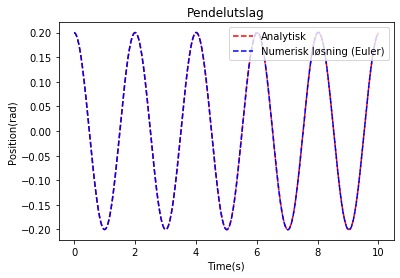

In [5]:
plt.figure(1)
plt.title("Pendelutslag")
plt.plot(times,theta_val,"--r",label="Analytisk")
plt.plot(tim,theta,"--b",label="Numerisk løsning (Euler)")
plt.xlabel("Time(s)")
plt.ylabel("Position(rad)")
plt.legend(loc="upper right")
plt.show()

$\textbf{d)}$ Observer fra plottet over, at amplituden til utslagsvinkel for den numeriske løsningen vil øke med tid. Vi skal nå se på energien til pendelen og forstå hvorfor dette skjer. 
<ol>
<li>Vis at energien til pendelen er gitt ved $E = E_k + E_p = \frac{1}{2} m l^2 \omega^2 + \frac{1}{2} mgl\theta^2$.<br>
$\textit{Hint:}$ Skriv ned det generelle utrykket for energi, og utrykk hastigheten i vinkelhastigheten. Definer nullpunktet for den postensielle energien der $\theta = \frac{\pi}{2}$.</li><br>
<li>Skriv en funksjon som returnerer en array med den totale energien til pendelen for tider opp til $t=10.0$s.<br>
    $\textit{Hint:}$ Husk numpy arrays er kompatible med vanlige operatorer. </li><br>
<li> Plot den totale energien til pendelen som funksjon av tid, for tidssteg $\Delta t = 0.001$ s, $\Delta t = 0.004$ s og $\Delta t = 0.007$ s. Husk å gi plottene passende label, og inkluder legend. Du vil observere at den totale energien øker med tid. Energien vil øke mindre for små tidssteg, men vil alltid øke litt. Vi må derfor benytte en annen metode for å få en fysisk løsning (dette skal vi implementere i neste øving).</li>
</ol>


-------

1. SKRIV HER (eller på papir)

--------

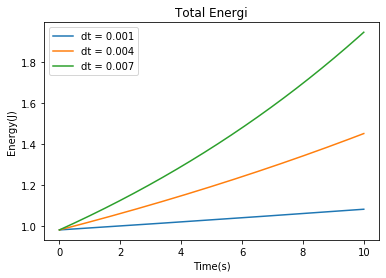

In [6]:
# 2.

def energy_calculation(theta_0, omega_0, dt):

    theta, omega, tim = euler_method(theta_0,omega_0,dt)

    energy_func = lambda m,l,omega,theta: (1/2)*m*(l**2)*(omega**2) + (1/2)*m*g*l*(theta**2)
    
    t = np.linspace(t_i,T,int(T/dt))
    energy = np.zeros(int(T/dt))
    
    for i in range(len(t)):
        energy[i] = energy_func(m,l,omega[i],theta[i])
    
    
    E_total = energy

    return t, E_total
# 3.

dt1 = 0.001
dt2 = 0.004
dt3 = 0.007

plt.figure(2)
plt.title("Total Energi")
plt.plot(energy_calculation(theta_0,omega_0,dt1)[0],energy_calculation(theta_0,omega_0,dt1)[1], label="dt = 0.001")
plt.plot(energy_calculation(theta_0,omega_0,dt2)[0],energy_calculation(theta_0,omega_0,dt2)[1], label="dt = 0.004")
plt.plot(energy_calculation(theta_0,omega_0,dt3)[0],energy_calculation(theta_0,omega_0,dt3)[1], label="dt = 0.007")
plt.xlabel("Time(s)")
plt.ylabel("Energy(J)")
plt.legend()
plt.show()